In [1]:
import os
import time 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tflearn
import xgboost as xgb
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras import regularizers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from datetime import datetime

W0727 18:45:03.782751 140735532143488 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/tflearn/helpers/summarizer.py:9: The name tf.summary.merge is deprecated. Please use tf.compat.v1.summary.merge instead.

W0727 18:45:03.784034 140735532143488 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/tflearn/helpers/trainer.py:25: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0727 18:45:03.792001 140735532143488 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/tflearn/collections.py:13: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0727 18:45:03.797072 140735532143488 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/tflearn/config.py:123: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.

W0727 18:45:03.804175 140735532143488 deprecation_wrapper.py:119] From /usr/local/lib/

In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("happiness_train_complete.csv",parse_dates=["survey_time"],index_col='id',encoding='latin-1')
test_data = pd.read_csv("happiness_test_complete.csv",parse_dates=["survey_time"],index_col='id',encoding='latin-1')


In [3]:
print(train_data.shape)
print(test_data.shape)

(8000, 139)
(2968, 138)


In [4]:
train_data.describe()

,happiness,survey_type,province,city,county,gender,birth,nationality,religion,religion_freq,edu,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,6880.000000,6028.000000,8.000000e+03,8000.000000,824.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,7996.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,7204.000000,7204.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,2951.000000,2951.000000,2951.000000,2951.000000,8000.000000,8000.000000,8000.000000,8000.000000,7.999000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.0,8000.000000,8000.000000,8000.000000,8000.000000,6934.000000,8000.000000,7172.000000,6282.000000,6230.000000,6282.000000,6282.000000,6282.000000,6.282000e+03,6282.000000,2565.000000,2565.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000
mean,3.850125,1.405500,15.155375,42.564750,70.619000,1.53000,1964.707625,1.37350,0.772250,1.427250,4.878375,3.505523,1574.742867,3.330734e+04,1.317750,1785.067961,115.302954,0.007875,0.473000,0.268500,0.101125,0.102750,0.023625,0.004000,0.022500,0.13600,163.989750,121.575625,3.598500,3.786250,3.819375,1.893750,1.375938,1.891875,1.710125,1.797375,3.915375,2.368625,1.60575,1.625250,4.496500,3.452375,3.762125,4.402625,3.756250,3.554000,3.591500,3.521500,4.713500,4.482125,3.427375,2.790625,3.291000,1.92650,3.474181,3.622432,1.825500,3.135125,4.192250,3.439625,4.445125,2.925375,2.979750,3.155202,14.500508,0.906811,2.652321,1.062125,1.232875,1.820875,1.835625,6.776050e+04,2.882500,2.595875,1.063625,1.817125,0.014875,0.909500,0.06150,0.020750,0.004750,0.001875,0.0,0.000750,0.000750,0.924375,0.767125,0.456879,3.234375,1825.481177,1963.963069,1868.025522,4.614454,1.319007,1.842566,2.836550e+04,2.838427,3.175828,0.963743,1108.42025,2.043500,1.079125,2.744625,1150.667250,1.550500,0.89900,4.027500,2.226125,1.7025

将数据拼接在一起，方便之后的处理

In [5]:
concate = pd.concat([train_data,test_data])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


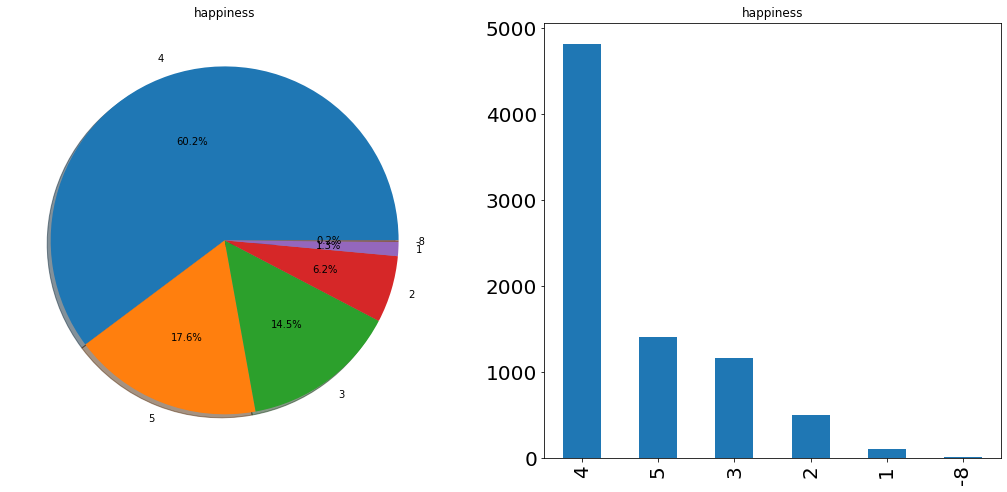

In [6]:
#数据不均衡
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['happiness'].value_counts().plot.pie(autopct='%3.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('happiness')
ax[0].set_ylabel('')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
train_data['happiness'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('happiness')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

可以看到，标记的占比比较不平衡，幸福感为4或5，也就是感动比较幸福或非常幸福的人群打到77%。同时也有0.2%的人群标记为-8。根据解析文档，此部分人群无法回答此问题。由于占比较少，因此可以采取删除这部分数据，或者将其标记转换为3：说不上幸福不幸福。本报告采取前一种做法。因为幸福感标记为-8的人群，其他列也有较多缺失，比如depression,class,health等于幸福感相关性较高的列

In [7]:
print(concate['happiness'].value_counts())
concate = concate[concate['happiness']!=-8]


 4.0    4818
 5.0    1410
 3.0    1159
 2.0     497
 1.0     104
-8.0      12
Name: happiness, dtype: int64


接下来查看一下缺失值的情况

In [8]:
# 查看每个特征的缺失情况
print("有"+str(concate.isnull().sum()[concate.isnull().sum()>0].shape[0])+"个特征缺失\n")
print(concate.isnull().sum()[concate.isnull().sum()>0].sort_values(ascending=False))

有26个特征缺失

edu_other          10950
invest_other       10911
property_other     10867
join_party          9831
s_work_type         7437
s_work_status       7437
work_yr             6932
work_status         6932
work_manage         6931
work_type           6931
happiness           2968
edu_yr              2754
marital_now         2445
s_work_exper        2365
s_birth             2365
s_edu               2365
s_hukou             2365
s_income            2365
s_political         2365
edu_status          1569
minor_child         1447
marital_1st         1128
social_neighbor     1096
social_friend       1096
hukou_loc              4
family_income          1
dtype: int64


可以看到有些列是有缺失数据的，而且有些甚至大部分缺失，如property_other列缺失7922列，但是总的数据只有8000列。这些缺失值太多的列显然是对最终结果作用不大的。
下边看看有缺失值的列的情况。

可以看到以下3列缺失值十分多，数据类型是object，在此也无法解码出其内容。因此这3列我们作删除处理

In [9]:
print(concate[concate['edu_other'].notnull()]['edu_other'][0:3])
print(concate[concate['invest_other'].notnull()]['invest_other'][0:3])
print(concate[concate['property_other'].notnull()]['property_other'][0:3])


del concate['edu_other']
del concate['invest_other']
del concate['property_other']

id
1170    Ò¹Ð£
2513    Ò¹Ð£
4926    Ò¹Ð£
Name: edu_other, dtype: object
id
152     Àí²Æ²úÆ·
424     Ãñ¼ä½è´û
1421    ÒøÐÐÀí²Æ
Name: invest_other, dtype: object
id
76              ÎÞ²úÈ¨
92    ÒÑ¹ºÂò£¬µ«Î´¹ý»§
99        ¼ÒÍ¥¹²Í¬ËùÓÐ
Name: property_other, dtype: object


特征缺失的列中，join_party一列也是缺失挺多的，查看问卷说明发现此处是填写入党时间，只有党员才需要填写此项。为简便起见可以认为入党时间与是否幸福相关性不高，因此将其删除

In [10]:
print(concate[concate['join_party'].notnull()]['political'].value_counts())#此值为4说明填写人为党员
print(concate[concate['join_party'].notnull()]['join_party'][0:10])
del concate['join_party']

4    1125
Name: political, dtype: int64
id
7      1980.0
13     2002.0
20     1998.0
35       -2.0
57     1989.0
60     1988.0
61     2015.0
85     1993.0
95     1997.0
122    2000.0
Name: join_party, dtype: float64


下边调整关于s\_\*行的缺失情况。查看问卷发现，s\_\*行是关于配偶的信息，如果没有配偶，则该系列问题被跳过。因此缺失值可以用0值代替，以代表其为空值，从s_work_expr到s_political值都可以如此处理。而s_income和s_birth两列分别是配偶收入和出生日期，取值比较分散，简单起见该两行删除处理。

s_work_status和s_work_type缺失值比其余的配偶信息列要多，查看发现是因为其值是关于配偶的工作信息，如果配偶没有工作，此列也是跳过。因此在填充时，可以尝试针对没有工作的配偶填充-1值，没有配偶的填充0，以区别两种样本。

In [11]:
print("s_work_exper取值情况：\n"+str(concate[concate['s_work_exper'].notnull()]['s_work_exper'].value_counts().index.tolist()))
print("s_edu取值情况：\n"+str(concate[concate['s_edu'].notnull()]['s_edu'].value_counts().index.tolist()))
print("s_hukou取值情况：\n"+str(concate[concate['s_hukou'].notnull()]['s_hukou'].value_counts().index.tolist()))
print("s_political取值情况：\n"+str(concate[concate['s_political'].notnull()]['s_political'].value_counts().index.tolist()))

print("s_work_status取值情况：\n"+str(concate[concate['s_work_status'].notnull()]['s_work_status'].value_counts().index.tolist()))
print("s_work_type取值情况：\n"+str(concate[concate['s_work_type'].notnull()]['s_work_type'].value_counts().index.tolist()))


s_work_exper取值情况：
[1.0, 5.0, 3.0, 4.0, 6.0, 2.0]
s_edu取值情况：
[4.0, 3.0, 1.0, 6.0, 12.0, 7.0, 10.0, 9.0, 11.0, 5.0, 13.0, 2.0, 8.0, -8.0, 14.0]
s_hukou取值情况：
[1.0, 2.0, 5.0, 4.0, -8.0, 6.0, 8.0, 7.0, 3.0]
s_political取值情况：
[1.0, 4.0, 2.0, -8.0, 3.0]
s_work_status取值情况：
[3.0, 5.0, 2.0, 1.0, 4.0, 8.0, 6.0, -8.0, 7.0, 9.0]
s_work_type取值情况：
[1.0, 2.0, -8.0]


In [12]:
del concate['s_income']
del concate['s_birth']

#对于取值为-8的数据，将其变为0，当做没有配偶处理
concate['s_edu']=concate['s_edu'].map(lambda x:0 if x==-8 else x)
concate['s_hukou']=concate['s_edu'].map(lambda x:0 if x==-8 else x)
concate['s_political']=concate['s_political'].map(lambda x:0 if x==-8 else x)
concate['s_work_status']=concate['s_work_status'].map(lambda x:0 if x==-8 else x)
concate['s_work_type']=concate['s_work_type'].map(lambda x:0 if x==-8 else x)
concate['s_work_exper']=concate['s_work_exper'].map(lambda x:0 if x==-8 else x)

#将有配偶但是没工作的样本填充-1
concate['s_work_status']=concate[concate['s_edu'].notnull()]['s_work_status'].fillna(-1)
concate['s_work_type']=concate[concate['s_edu'].notnull()]['s_work_type'].fillna(-1)

#将没配偶的样本填充0
concate['s_edu'].fillna(0,inplace=True)
concate['s_hukou'].fillna(0,inplace=True)
concate['s_political'].fillna(0,inplace=True)
concate['s_work_status'].fillna(0,inplace=True)
concate['s_work_type'].fillna(0,inplace=True)
concate['s_work_exper'].fillna(0,inplace=True)

之后是处理关于工作，也就是work\*一系列的缺失值。经过查看问卷说明发现此列样本缺失是因为该样本没有工作，因此跳过该系列问题。

对于manage,type,status这3列，因为是离散取数，所以直接填充0值就可以，同时值-8也是无效数据，也将其变为0.

对于work_yr，因为其是连续数据，因此填充0值的话可能不太好。这里我选择填充均值处理。

In [13]:
print("work_manage取值情况：\n"+str(concate[concate['work_manage'].notnull()]['work_manage'].value_counts().index.tolist()))
print("work_type取值情况：\n"+str(concate[concate['work_type'].notnull()]['work_type'].value_counts().index.tolist()))
print("work_yr取值情况：\n"+str(concate[concate['work_yr'].notnull()]['work_yr'].value_counts().index.tolist()))
print("work_status取值情况：\n"+str(concate[concate['work_status'].notnull()]['work_status'].value_counts().index.tolist()))


work_manage取值情况：
[3.0, 2.0, 4.0, 1.0, -8.0]
work_type取值情况：
[1.0, 2.0, -8.0]
work_yr取值情况：
[20.0, 10.0, 1.0, 5.0, 15.0, 30.0, 3.0, 4.0, 2.0, 8.0, 25.0, 6.0, 7.0, 12.0, -2.0, 13.0, -1.0, 18.0, 11.0, 9.0, 16.0, 23.0, 14.0, 22.0, 27.0, 35.0, 26.0, 24.0, 28.0, 40.0, 32.0, 21.0, 33.0, 17.0, 19.0, 31.0, 34.0, 29.0, 36.0, 37.0, 38.0, 42.0, -3.0, 45.0, 43.0, 0.0, 39.0, 46.0, 50.0, 41.0, 44.0, 52.0, 48.0, 47.0, 49.0, 55.0]
work_status取值情况：
[3.0, 2.0, 5.0, 1.0, 4.0, 8.0, 6.0, 9.0, -8.0, 7.0]


In [14]:
concate['work_manage']=concate['work_manage'].map(lambda x:0 if x<0 else x)
concate['work_type']=concate['work_type'].map(lambda x:0 if x<0 else x)
concate['work_yr']=concate['work_yr'].map(lambda x:concate['work_yr'].mean() if x<0 else x)
concate['work_status']=concate['work_status'].map(lambda x:0 if x<0 else x)

concate['work_manage'].fillna(0,inplace=True)
concate['work_type'].fillna(0,inplace=True)
concate['work_yr'].fillna(float(int(concate['work_yr'].mean())),inplace=True)
concate['work_status'].fillna(0,inplace=True)


edu_yr和edu_status为空的原因，是因为没有受到教育，或者没有毕业。

对于edu_status，因为其是取值较少，因此可以将空值以及无效值-8填充为0

对于edu_yr，其意义为取得最高学位的年份。对于空白数据或无效数据，我们可以填充样本的出生日期，并且可以创建一列来表示其受教育时长。这样edu_yr为0的数据就表明其没有受过教育

In [15]:
print("edu_yr取值情况：\n"+str(concate[concate['edu_yr'].notnull()]['edu_yr'].value_counts().index.tolist()))
print("edu_status取值情况：\n"+str(concate[concate['edu_status'].notnull()]['edu_status'].value_counts().index.tolist()))


edu_yr取值情况：
[-2.0, 2013.0, 1980.0, 2014.0, 1978.0, 2015.0, 2012.0, 1979.0, -1.0, 1983.0, 1981.0, 1989.0, 2008.0, 1982.0, 1990.0, 1976.0, 1997.0, 1992.0, 1986.0, 2005.0, 2010.0, 2002.0, 1999.0, 1988.0, 1998.0, 1995.0, 2007.0, 1984.0, 1985.0, 1977.0, 2000.0, 1987.0, 1994.0, 2009.0, 2006.0, 1996.0, 2004.0, 1974.0, 2003.0, 2011.0, 1975.0, 1972.0, 1993.0, 1973.0, 1966.0, 1968.0, 1991.0, 2001.0, 1963.0, 1970.0, 1967.0, 1962.0, 1960.0, 1971.0, 1969.0, 1965.0, 1964.0, 1957.0, 1961.0, -3.0, 1958.0, 1959.0, 1955.0, 1956.0, 1954.0, 1953.0, 1952.0, 1950.0, 1947.0, 1949.0, 1948.0, 1945.0, 1942.0, 1951.0, 1943.0, 1939.0, 1946.0, 1938.0, 1941.0, 1944.0, 1935.0, 1934.0, 1937.0]
edu_status取值情况：
[4.0, 2.0, 1.0, 3.0, -8.0]


In [16]:
concate['edu_status']=concate['edu_status'].map(lambda x:0 if x<0 else x)
concate['edu_yr']=concate['edu_yr'].map(lambda x:np.nan if x<0 else x)

concate['edu_status'].fillna(0,inplace=True)
concate['edu_yr'].fillna(concate['birth'],inplace=True)
concate['edu_yr']=concate['edu_yr']-concate['birth']

martial_now,martial_1st,minor_child分别为与目前配偶结婚时间，第一次结婚时间，18岁以下孩子数目。这些项目缺失是因为没有结婚，没有孩子的缘故。

可以尝试创建2个新列，分别是与目前配偶结婚时长，是否离过婚。



In [17]:
print("marital_now取值情况：\n"+str(concate[concate['marital_now'].notnull()]['marital_now'].value_counts().index.tolist()))
print("marital_1st取值情况：\n"+str(concate[concate['marital_1st'].notnull()]['marital_1st'].value_counts().index.tolist()))
print("minor_child取值情况：\n"+str(concate[concate['minor_child'].notnull()]['minor_child'].value_counts().index.tolist()))


marital_now取值情况：
[-2.0, 1980.0, 1990.0, 1985.0, 1982.0, 1988.0, 2000.0, 1984.0, 1987.0, 1986.0, 1989.0, 1981.0, 1994.0, 1983.0, 1992.0, 1993.0, 1979.0, 1995.0, 1991.0, 1997.0, 1978.0, 2005.0, 1998.0, 2013.0, 2010.0, 2008.0, 1975.0, 2014.0, 1970.0, 2006.0, 2004.0, 1996.0, 1999.0, 2002.0, 1976.0, 2012.0, 1968.0, 2011.0, 2003.0, 1969.0, 2007.0, 1972.0, 2009.0, 1977.0, 1971.0, 2001.0, 1974.0, 1973.0, 1967.0, 1962.0, 1964.0, -3.0, 1966.0, 1961.0, 1963.0, 1965.0, 2015.0, 1960.0, 1958.0, 1959.0, 1957.0, 1956.0, 1955.0, 1952.0, 1953.0, 1954.0, -1.0, 1949.0, 1950.0, 1946.0, 1948.0, 1947.0, 1945.0, 1943.0, 1951.0, 1941.0, 1942.0, 1939.0, 1937.0, 1934.0, 1944.0]
marital_1st取值情况：
[-2.0, 1980.0, 1990.0, 1982.0, 1985.0, 1988.0, 1984.0, 1986.0, 2000.0, 1987.0, 1989.0, 1983.0, 1981.0, 1979.0, 1994.0, 1993.0, 1992.0, 1995.0, 1991.0, 1978.0, 1970.0, 1975.0, 1997.0, 2005.0, 1998.0, 1968.0, 1996.0, 1976.0, 2010.0, 2013.0, 2008.0, 1969.0, 2014.0, 2004.0, 2006.0, 1972.0, 1999.0, -3.0, 2002.0, 1974.0, 1977.0

In [18]:
#填充minor_child空值以及无效值
concate['minor_child']=concate['minor_child'].map(lambda x:-1 if x<0 else x)
concate['minor_child'].fillna(-1,inplace=True)

#将结婚年份转化为结婚时长
concate['survey_time'] = concate['survey_time'].dt.year

concate['marital_now'].fillna(concate['survey_time'],inplace=True)
concate['marital_1st'].fillna(concate['survey_time'],inplace=True)


concate['marital_now'] = concate['survey_time']-concate['marital_now']
concate['marital_1st'] = concate['survey_time']-concate['marital_1st']

concate['marital_now']=concate['marital_now'].map(lambda x: float(int(concate[concate['marital_now']<2000]['marital_now'].mean())) if x>2000 else x)
concate['marital_1st']=concate['marital_1st'].map(lambda x: float(int(concate[concate['marital_1st']<2000]['marital_1st'].mean())) if x>2000 else x)



接下来是处理一些与幸福感相关性可能较高的列。包括depression,equity,city,class,floor_area,family_income,birth，health等。

首先查看一下depression的分布以及无效值

训练集depression中有 16 个无效数据
测试集depression中有 10 个无效数据


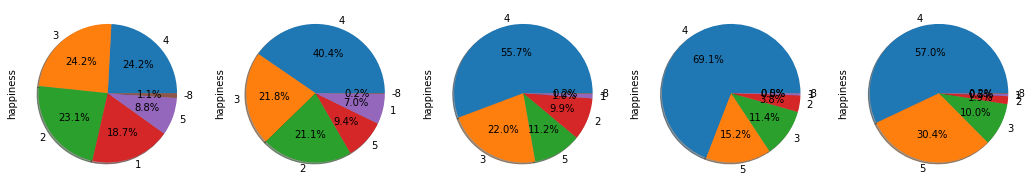

depression        1.000000
health_problem    0.454535
health            0.424437
happiness         0.299933
class             0.185617
edu               0.174812
Name: depression, dtype: float64


In [19]:
print("训练集depression中有",train_data[train_data['depression']==-8]['depression'].value_counts().values[0],"个无效数据")
print("测试集depression中有",test_data[test_data['depression']==-8]['depression'].value_counts().values[0],"个无效数据")
figure1,ax1 = plt.subplots(1,5,figsize=(18,4))
train_data['happiness'][train_data['depression']==1].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[0],shadow=True)
train_data['happiness'][train_data['depression']==2].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[1],shadow=True)
train_data['happiness'][train_data['depression']==3].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[2],shadow=True)
train_data['happiness'][train_data['depression']==4].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[3],shadow=True)
train_data['happiness'][train_data['depression']==5].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[4],shadow=True)
plt.show()
print(train_data.corr()['depression'].sort_values(ascending=False)[0:6])

从以上可以看到，depression与happiness确实存在较高相关性，happiness越高的样本，depression为4,5的占比越高。

训练集和测试集depression样本都存在十多个无效数据，根据相关性列表可知，其与health的相关性也是很高，因此可以根据health中的depression分布来填充空白数据

In [20]:
guess_depress = np.zeros((5))
for i in range(5):
        
    guess_df = concate[(concate['health'] == i)&(concate['health']!= -8)]['depression']
    guess_depress[i] = guess_df.median()

            
for i in range(5):
    concate.loc[(concate['health']==i)&(concate['depression']==-8),'depression'] = guess_depress[i]



下边分析一下公民感到平等程度equity与幸福感happiness的关系

训练集equity中有 42 个无效数据
测试集equity中有 22 个无效数据


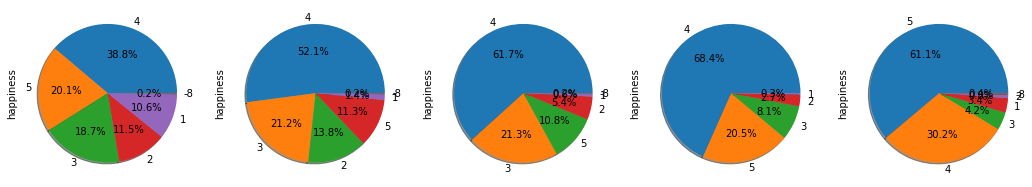

equity              1.000000
happiness           0.245552
public_service_5    0.193908
public_service_7    0.192920
public_service_6    0.191962
public_service_4    0.181337
Name: equity, dtype: float64


In [21]:
print("训练集equity中有",train_data[train_data['equity']==-8]['equity'].value_counts().values[0],"个无效数据")
print("测试集equity中有",test_data[test_data['equity']==-8]['equity'].value_counts().values[0],"个无效数据")
figure1,ax1 = plt.subplots(1,5,figsize=(18,4))
train_data['happiness'][train_data['equity']==1].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[0],shadow=True)
train_data['happiness'][train_data['equity']==2].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[1],shadow=True)
train_data['happiness'][train_data['equity']==3].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[2],shadow=True)
train_data['happiness'][train_data['equity']==4].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[3],shadow=True)
train_data['happiness'][train_data['equity']==5].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[4],shadow=True)
plt.show()
print(train_data.corr()['equity'].sort_values(ascending=False)[0:6])



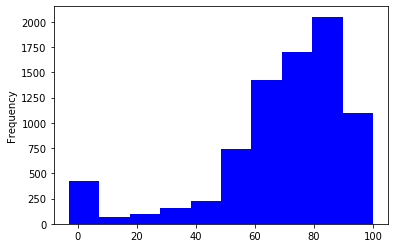

In [22]:
(train_data['public_service_7']).plot.hist(color='blue')


从以上分析可以看到，equity与public_service4,5,6,7都有较强相关性，说明公民感动平等的程度与对公共服务的满意程度相关。从饼图也可以看到，equity与happiness也有很大相关性，公民感到越平等，幸福感就越高。

测试集和训练集的equity列都有数十个无效数据，可以根据public_service7的分布来填充这些无效数据。首先将public_service7进行分层处理

In [23]:

concate.loc[concate['public_service_7']<=20,'public_service_7']=0
concate.loc[(concate['public_service_7'] > 20) & (concate['public_service_7'] <= 40), 'public_service_7'] = 1
concate.loc[(concate['public_service_7'] > 40) & (concate['public_service_7'] <= 60), 'public_service_7'] = 2
concate.loc[(concate['public_service_7'] > 60) & (concate['public_service_7'] <= 80), 'public_service_7'] = 3
concate.loc[(concate['public_service_7'] > 80) , 'public_service_7'] = 4


In [24]:
guess_eq = np.zeros((5))
for i in range(5):
        
    guess_df = concate[(concate['public_service_7'] == i)]['equity']
    guess_eq[i] = guess_df.median()

            
for i in range(5):
    concate.loc[(concate['public_service_7']==i)&(concate['equity']==-8),'equity'] = guess_eq[i]



下边查看住房建筑面积floor_area的分布情况。可以看到数据集中于200平米以下，这符合正常的分布。但是也有极少的样本建筑面积在500平米以上，这些样本虽然少，但是也不能忽略，为了让数据保持平衡，对floor_area取对数，可以看到处理后数据无异常值且近似正态分布。

<Figure size 432x288 with 0 Axes>

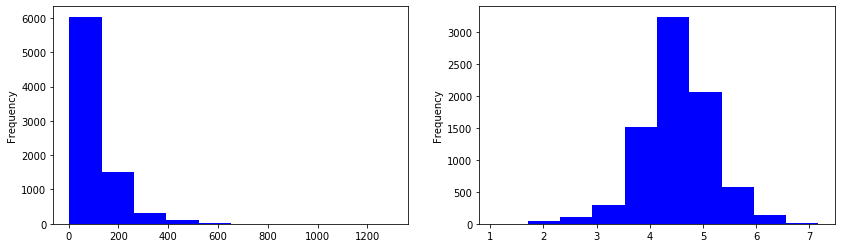

In [25]:
fig = plt.figure()
fig.set(alpha=0.2)
fig = plt.figure(figsize=(14,4))
plt.subplot2grid((1,2),(0,0))
(train_data['floor_area']).plot.hist(color='blue')

plt.subplot2grid((1,2),(0,1))
(np.log(train_data['floor_area'])).plot.hist(color='blue')

concate.loc[concate['floor_area']==0,'floor_area']=1 #测试集中有一个异常数据，将其映射到1

concate['floor_area'] = np.log(concate['floor_area'])


接下来处理family_income家庭收入一列。从下方的一个分布表可以看出，大部分样本的收入都位于10万以下，并且收入越高样本越少，并且也存在部分缺失事例。因此先对家庭收入进行分层处理，之后查看了一下与其相关性最高的列，发现教育程度、学习状态等都与收入是息息相关的。

家庭收入一列共有大约500个无效数据，这里利用了edu_status的取值来对这些无效值进行填充

训练集family_income中有 395 个无效数据
测试集family_income中有 188 个无效数据

family_income的分布
 count    1.095500e+04
mean     6.636564e+04
std      2.837421e+05
min     -3.000000e+00
25%      1.300000e+04
50%      3.840000e+04
75%      7.000000e+04
max      9.999992e+06
Name: family_income, dtype: float64

family_income与其它列的相关性
 family_income    1.000000
edu              0.360627
media_5          0.333339
edu_yr           0.324435
s_hukou          0.322284
s_edu            0.322284
media_1          0.271968
media_2          0.270066
learn            0.261589
edu_status       0.247814
Name: family_income, dtype: float64


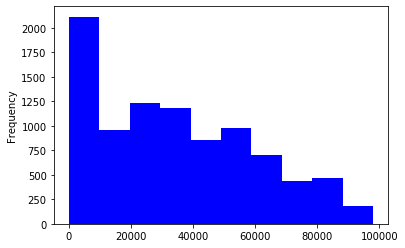

In [26]:
print("训练集family_income中有",train_data[train_data['family_income']<0]['family_income'].value_counts().values[0],"个无效数据")
print("测试集family_income中有",test_data[test_data['family_income']<0]['family_income'].value_counts().values[0],"个无效数据")
print("\nfamily_income的分布\n",concate['family_income'].describe())
concate[concate['family_income']<100000]['family_income'].plot.hist(color='blue')

concate.loc[(concate['family_income']>0)&(concate['family_income']<=20000),'family_income']=0
concate.loc[(concate['family_income']>20000)&(concate['family_income']<=40000),'family_income']=1
concate.loc[(concate['family_income']>40000)&(concate['family_income']<=60000),'family_income']=2
concate.loc[(concate['family_income']>60000)&(concate['family_income']<=80000),'family_income']=3
concate.loc[(concate['family_income']>80000)&(concate['family_income']<=100000),'family_income']=4
concate.loc[(concate['family_income']>100000),'family_income']=5

print("\nfamily_income与其它列的相关性\n",concate.corr()['family_income'].sort_values(ascending=False)[0:10])

In [27]:
guess_fi = np.zeros((5))
for i in range(5):
        
    guess_df = concate[(concate['edu_status'] == i)]['family_income']
    guess_fi[i] = guess_df.median()

            
for i in range(5):
    concate.loc[(concate['edu_status']==i)&(concate['family_income']<0),'family_income'] = guess_fi[i]



接下来查看健康状态health。这一列中无效数据比较少只有5个。根据health与happiness相关的对比也可以看到，健康程度越好，幸福感就越高。

查看相关性发现，健康问题health_problem与health相关性最高，因此用来填充health的无效值。

训练集health中有 5 个无效数据
测试集health中有 2 个无效数据


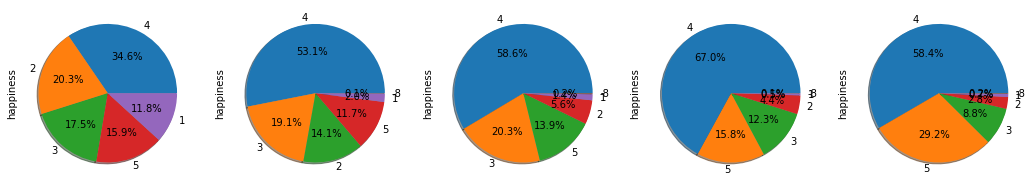

health            1.000000
health_problem    0.539950
depression        0.434895
birth             0.375087
media_5           0.322710
edu               0.256183
Name: health, dtype: float64


In [28]:
print("训练集health中有",train_data[train_data['health']<0]['health'].value_counts().values[0],"个无效数据")
print("测试集health中有",test_data[test_data['health']<0]['health'].value_counts().values[0],"个无效数据")
figure1,ax1 = plt.subplots(1,5,figsize=(18,4))
train_data['happiness'][train_data['health']==1].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[0],shadow=True)
train_data['happiness'][train_data['health']==2].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[1],shadow=True)
train_data['happiness'][train_data['health']==3].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[2],shadow=True)
train_data['happiness'][train_data['health']==4].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[3],shadow=True)
train_data['happiness'][train_data['health']==5].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[4],shadow=True)
plt.show()
print(concate.corr()['health'].sort_values(ascending=False)[0:6])



In [29]:
guess_hl = np.zeros((5))
for i in range(5):
        
    guess_df = concate[(concate['health_problem'] == i)]['health']
    guess_hl[i] = guess_df.median()

            
for i in range(5):
    concate.loc[(concate['health_problem']==i)&(concate['health']<0),'health'] = guess_hl[i]



接下来是处理出生日期birth字段，为了处理以及可视化方便，可以将其转化为年龄，然后对其编码

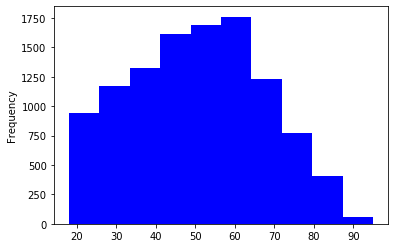

In [30]:
concate['Age'] = concate['survey_time']-concate['birth']
concate['Age'].plot.hist(color='blue')

concate.loc[(concate['Age'] > 16) & (concate['Age'] <= 32), 'Age'] = 1
concate.loc[(concate['Age'] > 32) & (concate['Age'] <= 48), 'Age'] = 2
concate.loc[(concate['Age'] > 48) & (concate['Age'] <= 64), 'Age'] = 3
concate.loc[(concate['Age'] > 64) & (concate['Age'] <= 80), 'Age'] = 4
concate.loc[ concate['Age'] > 80, 'Age'] = 5

最后删除一些无用的以及可能导致过拟合的列

In [31]:
del concate['birth']

train_data_num = concate['happiness'].notnull().sum()

train_data = concate[:train_data_num]
test_data  = concate[train_data_num:]

happiness = train_data['happiness']

train_data.drop(['happiness'],axis=1,inplace=True)
test_data.drop(['happiness'],axis=1,inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
#使用 5-折 方式的交叉验证来进行训练
kfold = KFold(n_splits=5, shuffle = True, random_state= 10)


#自定义评价函数
def myFeval(preds, xgbtrain):
    label = xgbtrain.get_label()
    score = mean_squared_error(label,preds)
    return 'myFeval',score

本报告用xgboost,lightgbm以及catboost对数据进行训练和预测。对预测的结果进行stacking作为预测值。训练时都是用5fold交叉验证进行。
每一个分类器在正式训练前都需要经过调参，用sklearn内置的GridSearchCV方法可以对参数进行网格化搜索。

针对xgboost调参

n_estimators 90

max_depth    3

min_child_weight 8

gamma 0.7

colsample_bytree 0.8

subsample  0.7

reg_alpha 0.1

reg_lambda 0.01

eta   0

learning_rate 0.1

In [33]:
X_train = train_data.values
y_train = happiness.values
from xgboost.sklearn import XGBRegressor

cv_params = {'learning_rate': [ 0.07, 0.08,0.1, 0.15]}
other_params = {"booster":'gbtree','eta': 0.00, 'max_depth': 3, 'subsample': 0.7, 'n_estimators': 90,'min_child_weight':8,
'gamma':0.7,'colsample_bytree': 0.8, 'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': True, 'nthread': 8,
               'learning_rate':0.01,'reg_alpha':0.1,'subsample':0.7}

model = XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   28.5s finished


参数的最佳取值：{'learning_rate': 0.1}
最佳模型得分:-0.4660064655799814


In [34]:
##### xgb
res_xgb = np.zeros((happiness.shape))
prediction_xgb = np.zeros((test_data.shape[0]))
#xgb_params = {"booster":'gbtree','eta': 0.005, 'max_depth': 3, 'subsample': 0.7, 'n_estimators': 90,
#              'colsample_bytree': 0.8, 'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': True, 'nthread': 8}
xgb_params = {"booster":'gbtree','eta': 0.00, 'max_depth': 3, 'subsample': 0.7, 'n_estimators': 90,'min_child_weight':8,
'gamma':0.7,'colsample_bytree': 0.8, 'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': True, 'nthread': 8,
               'learning_rate':0.01,'reg_alpha':0.1,'subsample':0.7}

mse=[]
for train, test in kfold.split(train_data):
    X_train = train_data.iloc[train]
    Y_train = happiness.iloc[train]
    X_test = train_data.iloc[test]
    Y_test = happiness.iloc[test]
    #weight = train_weight[train]
    trn_data = xgb.DMatrix(X_train, label=Y_train)
    val_data = xgb.DMatrix(X_test, label=Y_test)
    
    watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
    clf = xgb.train(dtrain=trn_data, num_boost_round=50000, evals=watchlist, early_stopping_rounds=200, verbose_eval=100, params=xgb_params,feval = myFeval)
    y_pred = clf.predict(xgb.DMatrix(X_test), ntree_limit=clf.best_ntree_limit)
    res_xgb[test] = clf.predict(xgb.DMatrix(train_data.iloc[test]), ntree_limit=clf.best_ntree_limit)
    mse.append(mean_squared_error(y_true=Y_test,y_pred=y_pred))
    prediction_xgb+=clf.predict(xgb.DMatrix(test_data), ntree_limit=clf.best_ntree_limit)/kfold.n_splits

#predictions_xgb += clf.predict(xgb.DMatrix(X_test), ntree_limit=clf.best_ntree_limit) / folds.n_splits
    
#print("CV score: {:<8.8f}".format(mean_squared_error(pred_xgb, test_Y[:,0])))

[0]	train-rmse:3.43015	valid_data-rmse:3.44435	train-myFeval:11.7658	valid_data-myFeval:11.8636
Multiple eval metrics have been passed: 'valid_data-myFeval' will be used for early stopping.

Will train until valid_data-myFeval hasn't improved in 200 rounds.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[100]	train-rmse:1.4234	valid_data-rmse:1.44006	train-myFeval:2.02606	valid_data-myFeval:2.07376
[200]	train-rmse:0.829479	valid_data-rmse:0.849046	train-myFeval:0.688036	valid_data-myFeval:0.720879
[300]	train-rmse:0.698952	valid_data-rmse:0.723833	train-myFeval:0.488533	valid_data-myFeval:0.523934
[400]	train-rmse:0.668748	valid_data-rmse:0.700189	train-myFeval:0.447225	valid_data-myFeval:0.490265
[500]	train-rmse:0.656171	valid_data-rmse:0.694612	train-myFeval:0.43056	valid_data-myFeval:0.482485
[600]	train-rmse:0.647467	valid_data-rmse:0.692238	train-myFeval:0.419213	valid_data-myFeval:0.479193
[700]	train-rmse:0.639876	valid_data-rmse:0.690984	train-myFeval:0.409441	valid_data-myFeval:0.477459
[800]	train-rmse:0.633408	valid_data-rmse:0.690111	train-myFeval:0.401206	valid_data-myFeval:0.476253
[900]	train-rmse:0.627531	valid_data-rmse:0.689169	train-myFeval:0.393795	valid_data-myFeval:0.474955
[1000]	train-rmse:0.621913	valid_data-rmse:0.688393	train-myFeval:0.386775	valid_data-my

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[100]	train-rmse:1.42451	valid_data-rmse:1.42733	train-myFeval:2.02922	valid_data-myFeval:2.03727
[200]	train-rmse:0.830816	valid_data-rmse:0.837481	train-myFeval:0.690255	valid_data-myFeval:0.701376
[300]	train-rmse:0.701032	valid_data-rmse:0.714135	train-myFeval:0.491445	valid_data-myFeval:0.509989
[400]	train-rmse:0.671153	valid_data-rmse:0.69083	train-myFeval:0.450446	valid_data-myFeval:0.477246
[500]	train-rmse:0.658828	valid_data-rmse:0.684225	train-myFeval:0.434055	valid_data-myFeval:0.468164
[600]	train-rmse:0.650193	valid_data-rmse:0.681278	train-myFeval:0.42275	valid_data-myFeval:0.46414
[700]	train-rmse:0.64321	valid_data-rmse:0.679793	train-myFeval:0.41372	valid_data-myFeval:0.462119
[800]	train-rmse:0.636813	valid_data-rmse:0.678448	train-myFeval:0.405531	valid_data-myFeval:0.460292
[900]	train-rmse:0.630888	valid_data-rmse:0.677694	train-myFeval:0.39802	valid_data-myFeval:0.459269
[1000]	train-rmse:0.625524	valid_data-rmse:0.676943	train-myFeval:0.39128	valid_data-myFeval

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[100]	train-rmse:1.42514	valid_data-rmse:1.42512	train-myFeval:2.03101	valid_data-myFeval:2.03097
[200]	train-rmse:0.830811	valid_data-rmse:0.840754	train-myFeval:0.690246	valid_data-myFeval:0.706868
[300]	train-rmse:0.700861	valid_data-rmse:0.719195	train-myFeval:0.491206	valid_data-myFeval:0.517241
[400]	train-rmse:0.671371	valid_data-rmse:0.69578	train-myFeval:0.45074	valid_data-myFeval:0.48411
[500]	train-rmse:0.659101	valid_data-rmse:0.689246	train-myFeval:0.434414	valid_data-myFeval:0.47506
[600]	train-rmse:0.650258	valid_data-rmse:0.685895	train-myFeval:0.422836	valid_data-myFeval:0.470452
[700]	train-rmse:0.642794	valid_data-rmse:0.683735	train-myFeval:0.413184	valid_data-myFeval:0.467494
[800]	train-rmse:0.636533	valid_data-rmse:0.681804	train-myFeval:0.405175	valid_data-myFeval:0.464856
[900]	train-rmse:0.630798	valid_data-rmse:0.681071	train-myFeval:0.397906	valid_data-myFeval:0.463858
[1000]	train-rmse:0.625659	valid_data-rmse:0.68058	train-myFeval:0.391449	valid_data-myFev

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[100]	train-rmse:1.42491	valid_data-rmse:1.4305	train-myFeval:2.03036	valid_data-myFeval:2.04634
[200]	train-rmse:0.830527	valid_data-rmse:0.841517	train-myFeval:0.689774	valid_data-myFeval:0.708151
[300]	train-rmse:0.699943	valid_data-rmse:0.717369	train-myFeval:0.48992	valid_data-myFeval:0.514618
[400]	train-rmse:0.670389	valid_data-rmse:0.692486	train-myFeval:0.449421	valid_data-myFeval:0.479537
[500]	train-rmse:0.658291	valid_data-rmse:0.685508	train-myFeval:0.433347	valid_data-myFeval:0.469921
[600]	train-rmse:0.649972	valid_data-rmse:0.682106	train-myFeval:0.422465	valid_data-myFeval:0.465269
[700]	train-rmse:0.64302	valid_data-rmse:0.679793	train-myFeval:0.413475	valid_data-myFeval:0.462118
[800]	train-rmse:0.636818	valid_data-rmse:0.677993	train-myFeval:0.405537	valid_data-myFeval:0.459675
[900]	train-rmse:0.631162	valid_data-rmse:0.676546	train-myFeval:0.398366	valid_data-myFeval:0.457714
[1000]	train-rmse:0.625892	valid_data-rmse:0.675593	train-myFeval:0.39174	valid_data-myFe

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[100]	train-rmse:1.42552	valid_data-rmse:1.41592	train-myFeval:2.03211	valid_data-myFeval:2.00482
[200]	train-rmse:0.82886	valid_data-rmse:0.837308	train-myFeval:0.687011	valid_data-myFeval:0.701085
[300]	train-rmse:0.698283	valid_data-rmse:0.720547	train-myFeval:0.4876	valid_data-myFeval:0.519188
[400]	train-rmse:0.668805	valid_data-rmse:0.698998	train-myFeval:0.4473	valid_data-myFeval:0.488599
[500]	train-rmse:0.656556	valid_data-rmse:0.692692	train-myFeval:0.431066	valid_data-myFeval:0.479822
[600]	train-rmse:0.64818	valid_data-rmse:0.68959	train-myFeval:0.420137	valid_data-myFeval:0.475534
[700]	train-rmse:0.64086	valid_data-rmse:0.686805	train-myFeval:0.410701	valid_data-myFeval:0.471701
[800]	train-rmse:0.634173	valid_data-rmse:0.685032	train-myFeval:0.402176	valid_data-myFeval:0.469267
[900]	train-rmse:0.628363	valid_data-rmse:0.68394	train-myFeval:0.39484	valid_data-myFeval:0.467774
[1000]	train-rmse:0.622972	valid_data-rmse:0.682981	train-myFeval:0.388094	valid_data-myFeval:0.

In [35]:
print('xgboost的得分为：',np.mean(mse))

xgboost的得分为： 0.4613830217249009


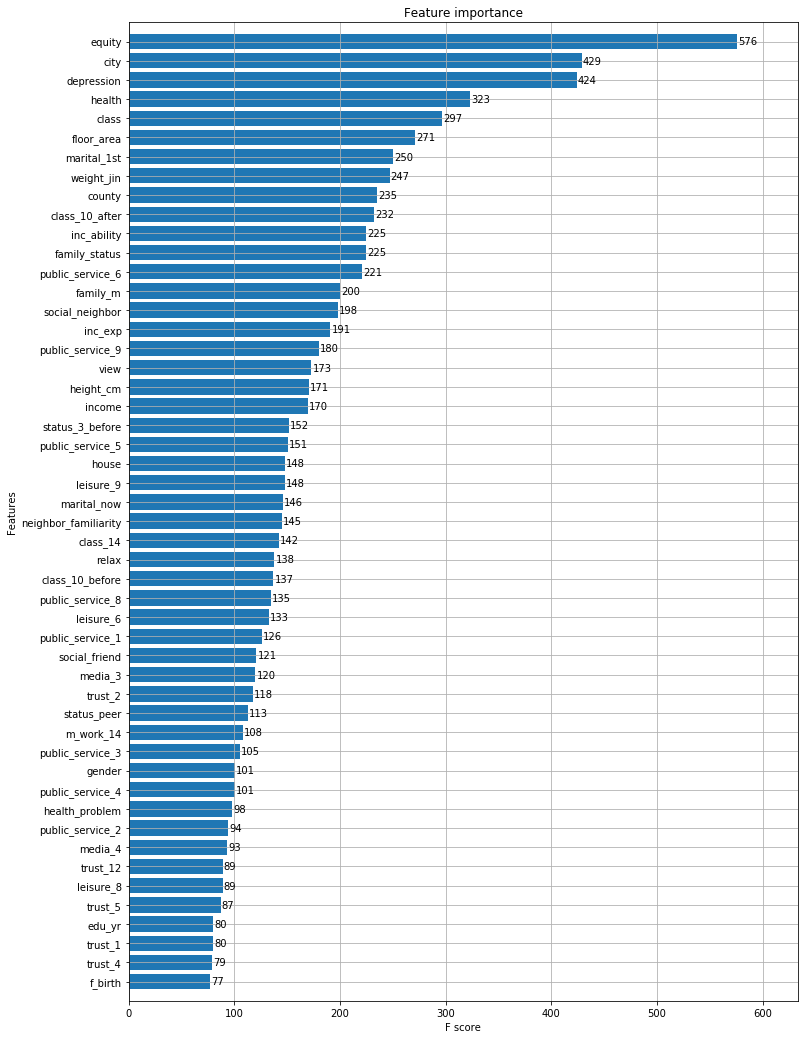

In [36]:
fig, ax = plt.subplots(figsize=(12,18))

xgb.plot_importance(clf, max_num_features=50, height=0.8,ax=ax)
plt.show()

可以看到对幸福感影响较高的因素有 公平感equity, 城市city, 沮丧程度depression, 健康程度health, 阶层class, 居住面积floor_area等，这也与我们认知中的比较一致。


以下针对lightgbm进行调参

n_estimators学习器数量，最佳是1750

max_depth树的最大深度，最佳是10

min_data_in_leaf叶最少数据，最佳为40

learning_rate学习率，最佳为0.01

num_leaves叶子数，最佳为11

bagging_fraction数据采样,最佳为0.6

bagging_freq bagging频率，最佳为3

feature_fraction特征采样，最佳为0.8

reg_alpha L1正则化参数，最佳为1

reg_lambda L2正则化参数，最佳为0.9

min_split_gain，最佳为1

In [38]:
X_train = train_data.values
y_train = happiness.values
from lightgbm.sklearn import LGBMRegressor

cv_params = {'min_split_gain': [0.6,0.7,0.8,0.9,1]}
other_params = {'learning_rate':0.01,
                      'n_estimators':1750,
                      'num_leaves':11,
                      'reg_alpha':1, 
                      'reg_lambda':0.9,
                      'min_split_gain':1,
                      'verbose_eval':200,
                      'verbosity':-1,
                      'bagging_fraction':0.6,
                      'subsample':0.81,
                      'min_child_weight':1,
                      'feature_fraction':0.8,
                      'min_data_in_leaf':40,
                      'bagging_freq':3,
                      'num_threads':4
         }

model = LGBMRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  1.5min finished


参数的最佳取值：{'min_split_gain': 1}
最佳模型得分:-0.45585769046266916


In [39]:
mse_lgb=[]
res_lgb = np.zeros((happiness.shape))
prediction_lgb = np.zeros((test_data.shape[0]))

from lightgbm.sklearn import LGBMRegressor
model = LGBMRegressor(n_jobs=-1,learning_rate=0.01,
                      n_estimators=1750,
                      num_leaves=11,
                      reg_alpha=1, 
                      reg_lambda=0.9,
                      min_split_gain=1,
                      verbose_eval=200,
                      verbosity=-1,
                      bagging_fraction=0.6,
                      subsample=0.81,
                      min_child_weight=1,
                      feature_fraction=0.8,
                      min_data_in_leaf=40,
                      bagging_freq=3
                     )

for train, test in kfold.split(train_data):
    X_train = train_data.iloc[train]
    y_train = happiness.iloc[train]
    X_test = train_data.iloc[test]
    y_test = happiness.iloc[test]
    model.fit(X_train,y_train)
    y_pred = (model.predict(X=X_test))
    res_lgb[test] = model.predict(X=train_data.iloc[test])
    prediction_lgb+=model.predict(X=test_data)/kfold.n_splits

    e = mean_squared_error(y_true=y_test,y_pred=y_pred)
    mse_lgb.append(e)

In [50]:
print('lightgmb得分：',np.mean(mse_lgb))

lightgmb得分： 0.45707007929849064


接下来对catboost调参，结果如下

colsample_bylevel 0.1

iterations        800

depth             5

l2_leaf_reg       1

learning_rate     0.051

In [43]:
X_train = train_data.values
y_train = happiness.values
from catboost import Pool, CatBoostRegressor

cv_params = {'iterations': [500,800,1000,1200]}
other_params = {'colsample_bylevel':0.1,
                          'thread_count':6,
                          'silent':True,
                          'iterations':800, 
                          'depth':5, 
                          'learning_rate':0.051, 
                          'loss_function':'RMSE',
                          'l2_leaf_reg': 1
         }

model = CatBoostRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  3.1min finished


参数的最佳取值：{'iterations': 800}
最佳模型得分:-0.4612023658705138


In [44]:
prediction_cat = np.zeros((test_data.shape[0]))

res_cat = np.zeros((happiness.shape))
model = CatBoostRegressor(colsample_bylevel=0.1,
                          thread_count=6,
                          silent=True,
                          iterations=800, 
                          depth=5, 
                          learning_rate=0.051, 
                          loss_function='RMSE',
                          l2_leaf_reg = 1)

mse_cat = []
i=0
for train, test in kfold.split(train_data):
    X_train = train_data.iloc[train]
    y_train = happiness.iloc[train]
    X_test = train_data.iloc[test]
    y_test = happiness.iloc[test]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    res_cat[test] = model.predict(train_data.iloc[test])
    err = mean_squared_error(y_true=y_test,y_pred=y_pred)
    prediction_cat+=model.predict(test_data)/kfold.n_splits

    mse_cat.append(err)


In [51]:
print('lightgmb得分：',np.mean(mse_cat))

lightgmb得分： 0.4616824959350157


In [60]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import  KFold, StratifiedKFold,GroupKFold, RepeatedKFold

# 将lgb和xgb的结果进行stacking
train_stack = np.vstack([res_lgb,res_xgb,res_cat]).transpose()
test_stack = np.vstack([prediction_lgb, prediction_xgb,prediction_cat]).transpose()
print(train_stack.shape)
folds_stack = RepeatedKFold(n_splits=5, n_repeats=5, random_state=4590)
oof_stack = np.zeros(train_stack.shape[0])
predictions = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack,happiness)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], happiness.iloc[trn_idx].values
    val_data, val_y = train_stack[val_idx], happiness.iloc[val_idx].values
    
    clf_3 = BayesianRidge()
    clf_3.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = clf_3.predict(val_data)
    predictions += clf_3.predict(test_stack) / 25
    
print('训练集最终得分：',mean_squared_error(happiness.values, oof_stack))
#print(predictions)


(7988, 3)
fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10
fold 11
fold 12
fold 13
fold 14
fold 15
fold 16
fold 17
fold 18
fold 19
fold 20
fold 21
fold 22
fold 23
fold 24
训练集最终得分： 0.45654177446276234


In [47]:
df2 = pd.read_csv("happiness_test_complete.csv",encoding="GB2312")
out = df2[["id"]]
out["happiness"] = predictions
out.to_csv("happiness_submit.csv",index=False)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
